In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\CSV files\student1.csv")

In [3]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [4]:
df.shape

(42, 6)

In [5]:
df.isnull().sum()

name        0
gmat        0
gpa         0
exp         0
admitted    0
country     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      42 non-null     object 
 1   gmat      42 non-null     int64  
 2   gpa       42 non-null     float64
 3   exp       42 non-null     int64  
 4   admitted  42 non-null     int64  
 5   country   42 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
df.drop(['name','country'],axis=1, inplace=True)

In [8]:
df.head()

,gmat,gpa,exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [9]:
X = df.drop('admitted', axis=1)

In [10]:
X.head()

,gmat,gpa,exp
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [11]:
y = df.admitted

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=8)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [16]:
knn.score(X_test, y_test)

0.8888888888888888

In [17]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1])

In [18]:
y_test

25    1
13    0
8     1
26    1
4     0
39    1
19    0
29    1
30    0
Name: admitted, dtype: int64

In [19]:
knn.predict([[720,3.2,3]])

array([1])

In [20]:
score = []
for i in range(2,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train) 
    accuracy = model.score(X_test, y_test)
    score.append(accuracy)

In [21]:
score

[0.7777777777777778,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 0.6666666666666666,
 0.7777777777777778]

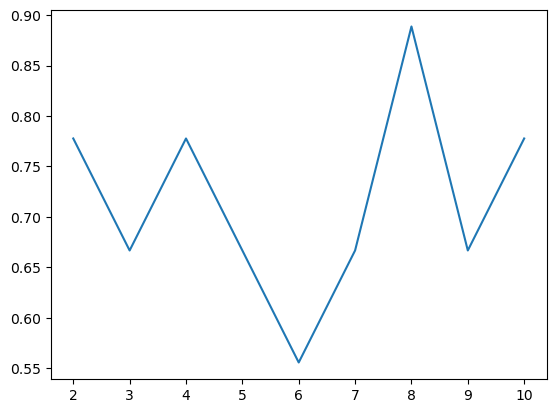

In [22]:
plt.plot(range(2,11),score)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_test ,y_pred)
cm

array([[3, 1],
       [0, 5]])

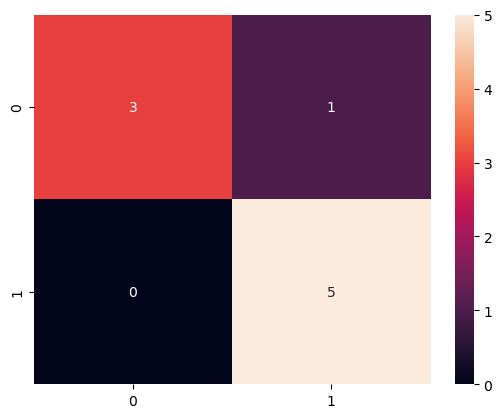

In [25]:
sns.heatmap(cm, annot=True)
plt.show()